In [747]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import cv2
from PIL import Image

In [748]:
original_image = cv2.imread("Test.png")
print(f"type of original image is: {type(original_image)}")
shape_original = np.shape(original_image)
print(f"shape of original image is: {shape_original} ")

type of original image is: <class 'numpy.ndarray'>
shape of original image is: (1944, 2592, 3) 


first ı would like to see both of layers it's may give me the clue about threshholding. 

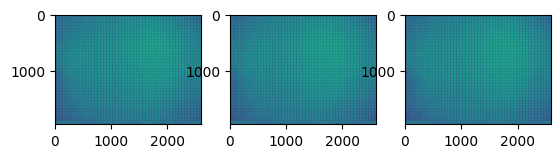

In [749]:
plt.figure(1)
plt.subplot(1,3,1)
plt.imshow(original_image[:,:,0])
plt.subplot(1,3,2)
plt.imshow(original_image[:,:,1])
plt.subplot(1,3,3)
plt.imshow(original_image[:,:,2])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

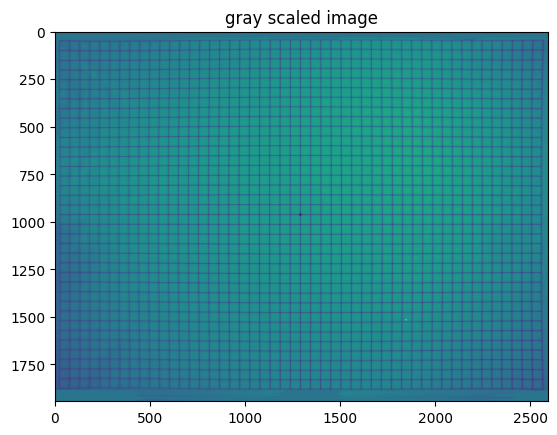

In [750]:
gray = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
plt.title("gray scaled image" )
plt.imshow(gray)
plt.show

In [751]:
#bigest common div is : 
print(f"most common divider is: {np.gcd(shape_original[0] , shape_original[1])}")

most common divider is: 648


In [752]:
y = np.arange(0 , shape_original[0]+1 , 648)
x = np.arange(0 , shape_original[1]+1 , 648)



print(x , y)

[   0  648 1296 1944 2592] [   0  648 1296 1944]


In [753]:

for i in range(len(y)):
    if i == len(y)-1:
        break
    order1 = [y[i] , y[i+1]]
    print(order1)
       
    

[0, 648]
[648, 1296]
[1296, 1944]


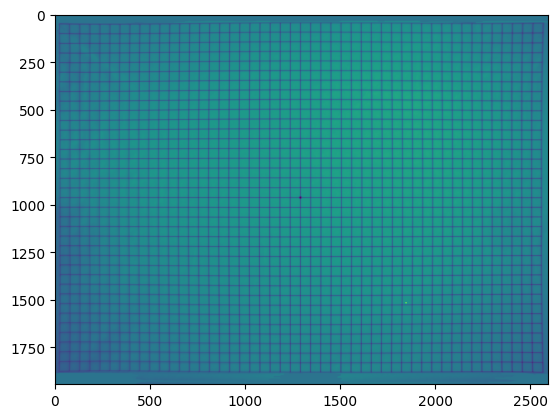

In [754]:
plt.imshow(gray)

In [755]:
listey = [[0, 648],
[648, 1296],
[1296, 1943],]

In [756]:
listex = [[0, 648],
[648, 1296],
[1296, 1944],
[1944, 2591]]

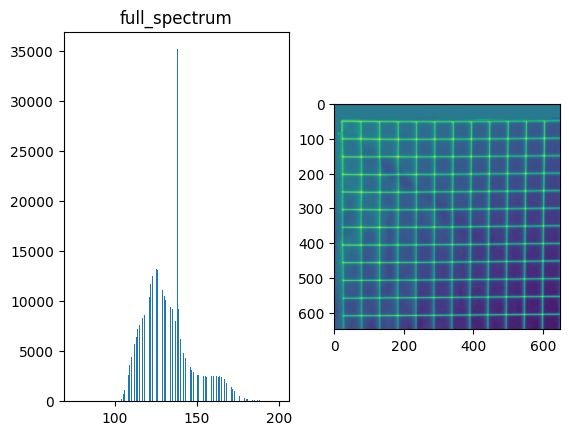

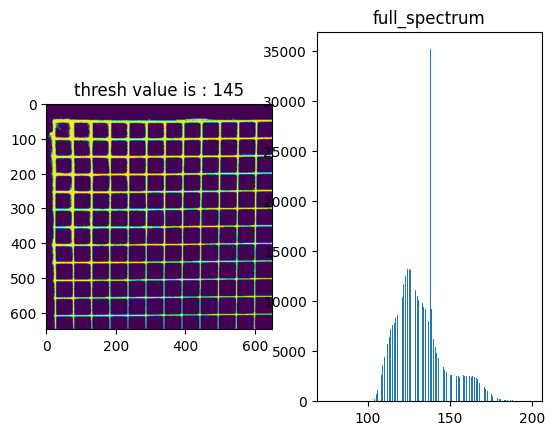

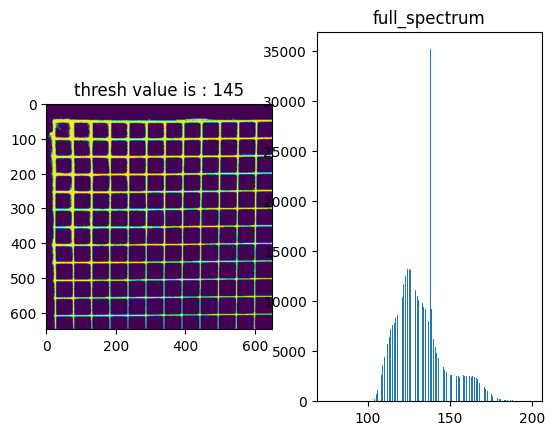

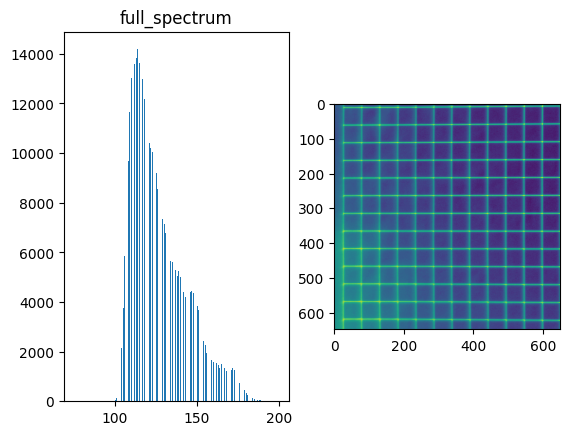

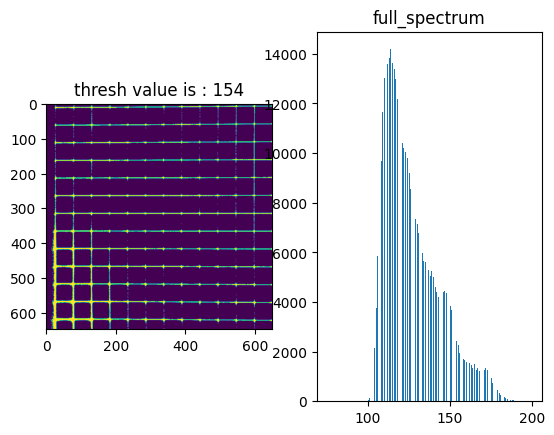

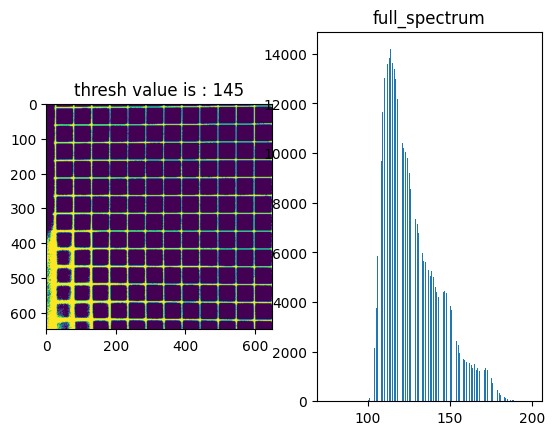

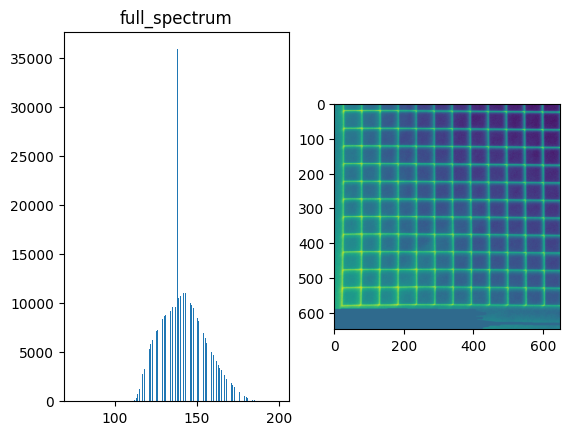

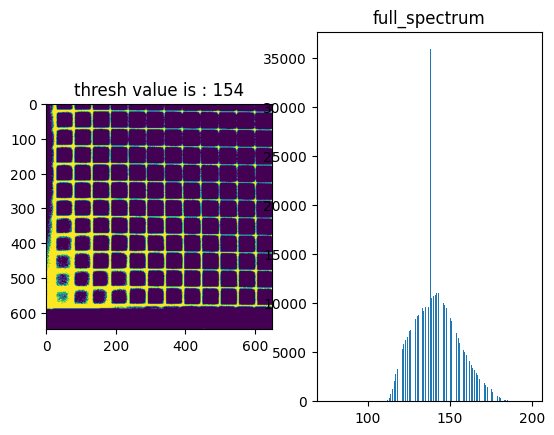

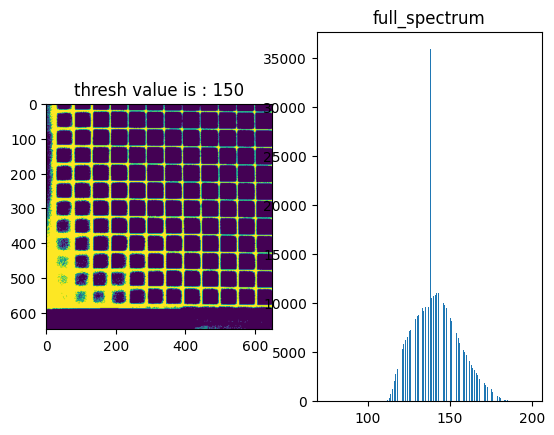

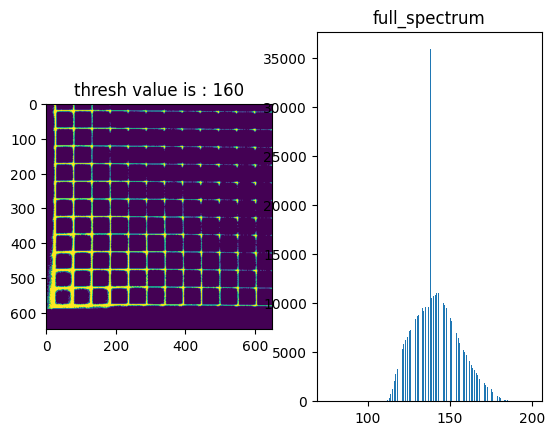

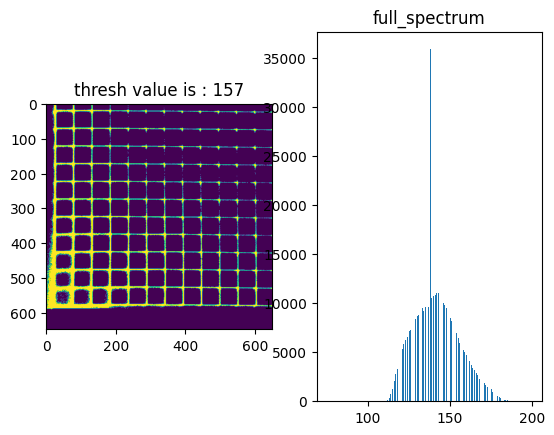

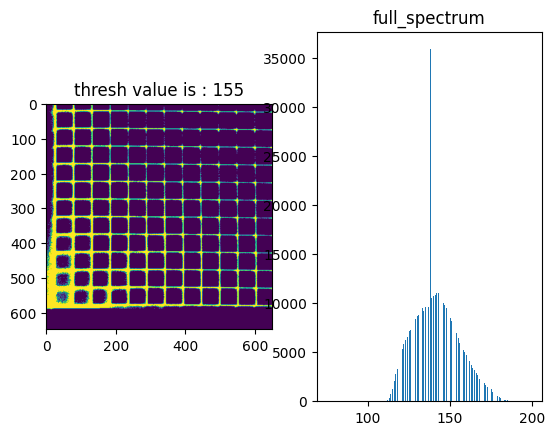

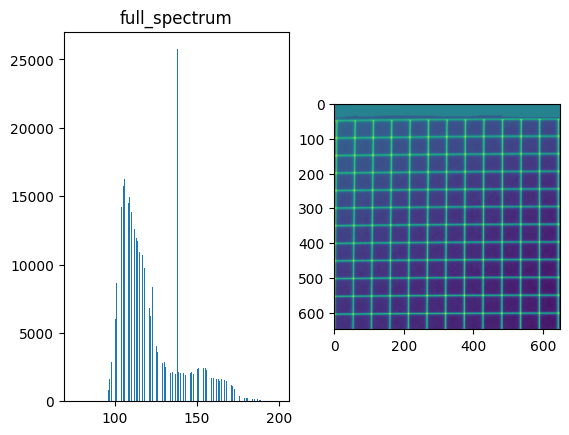

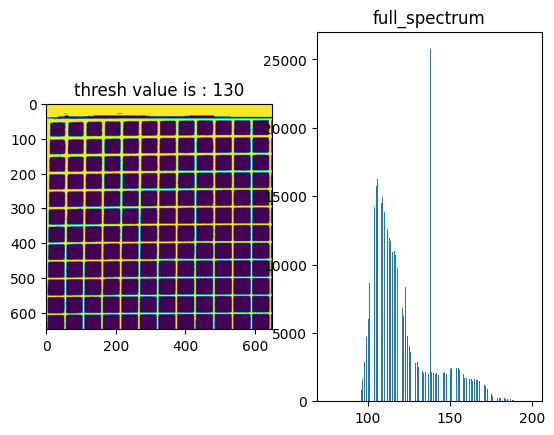

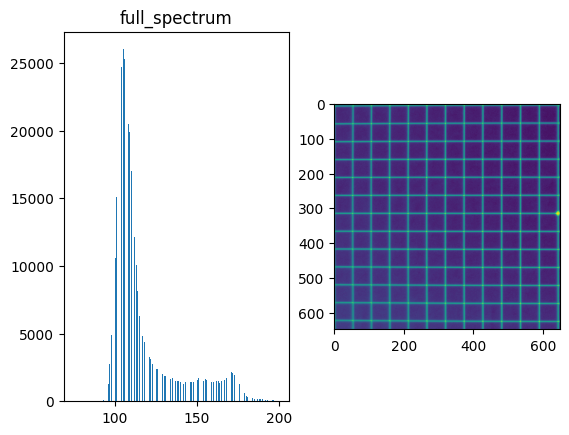

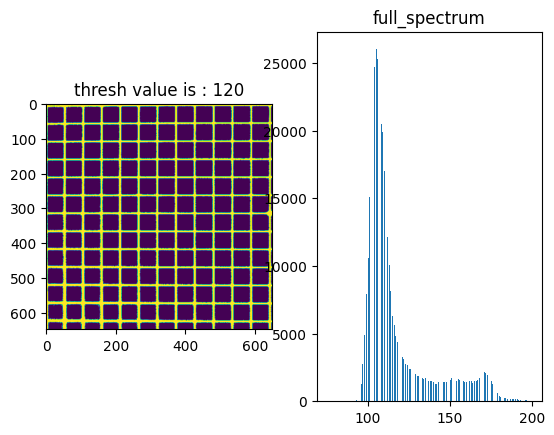

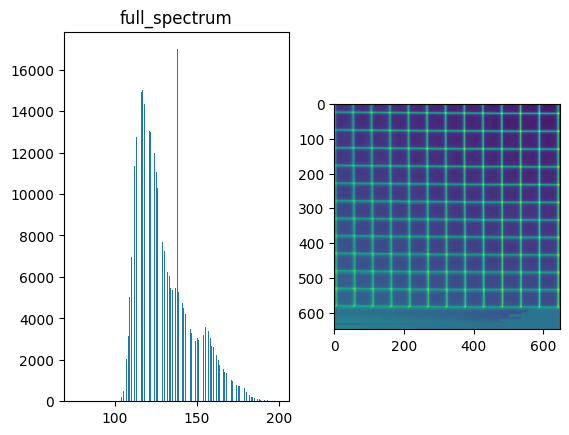

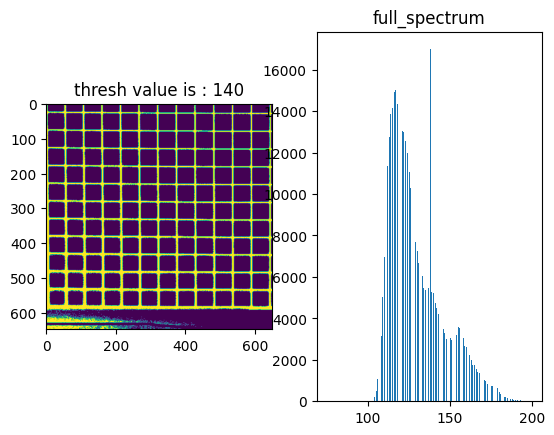

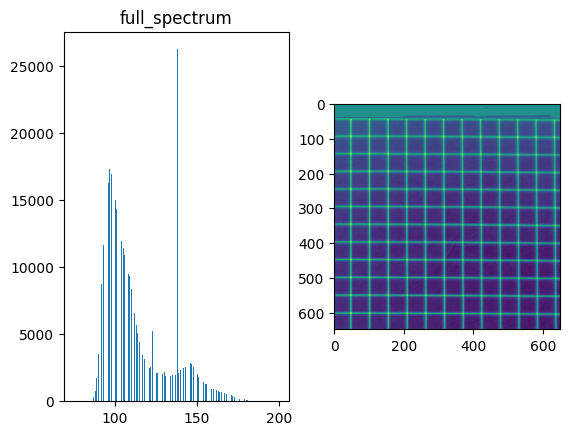

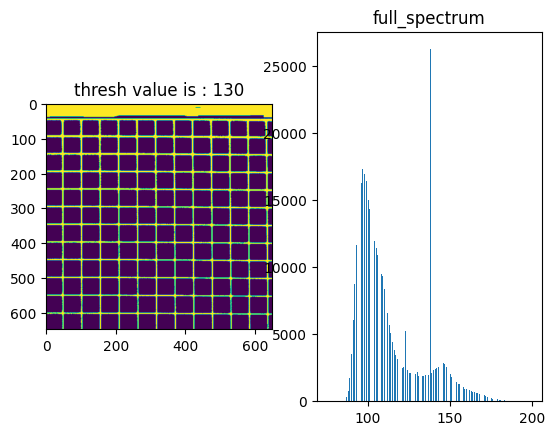

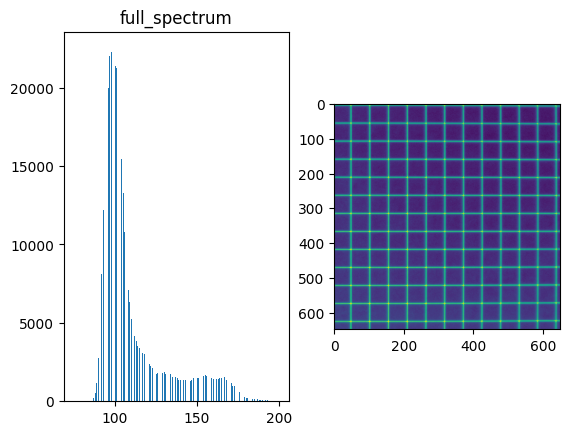

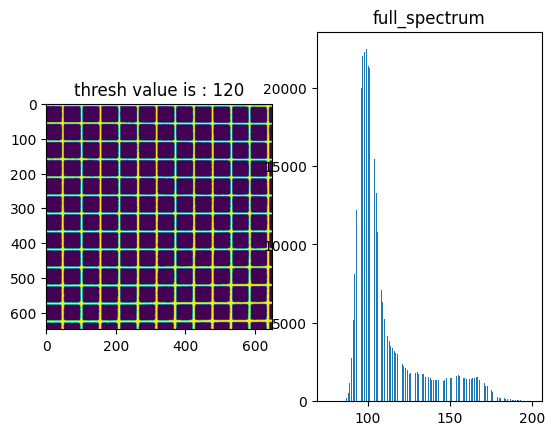

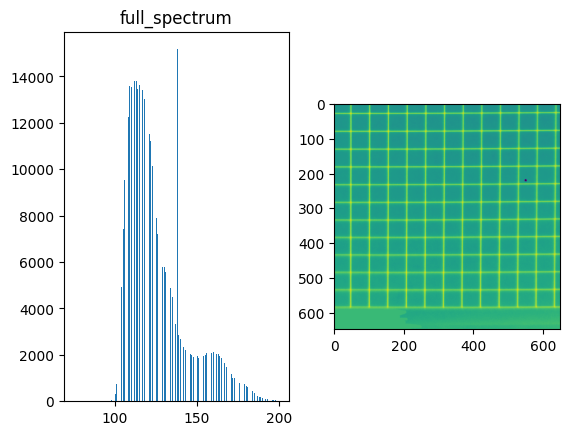

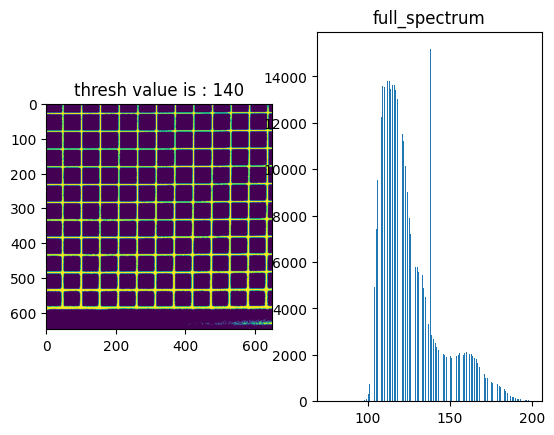

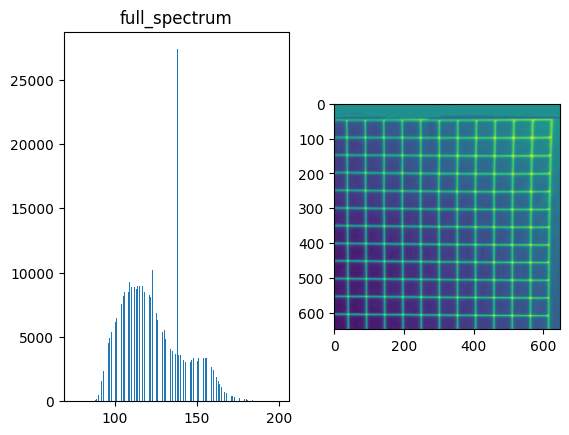

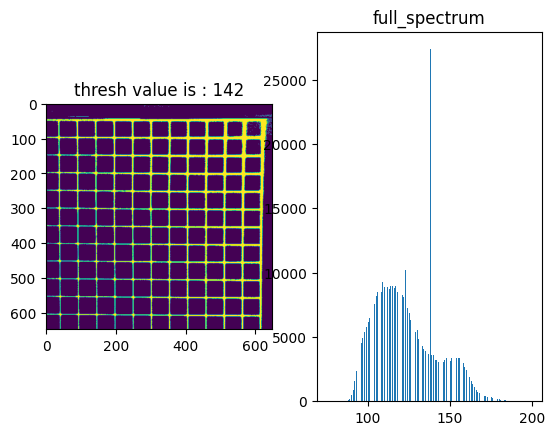

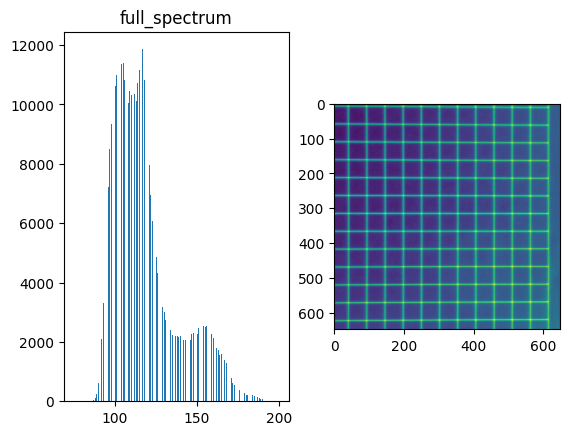

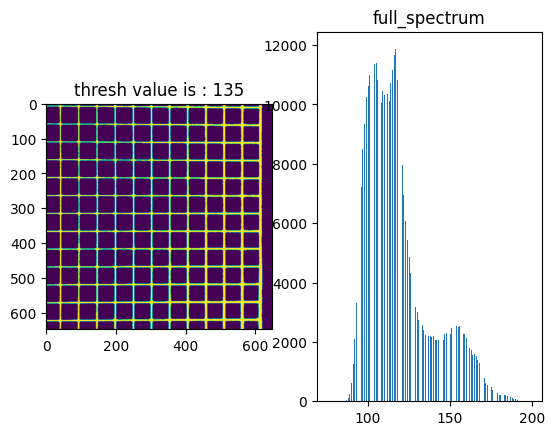

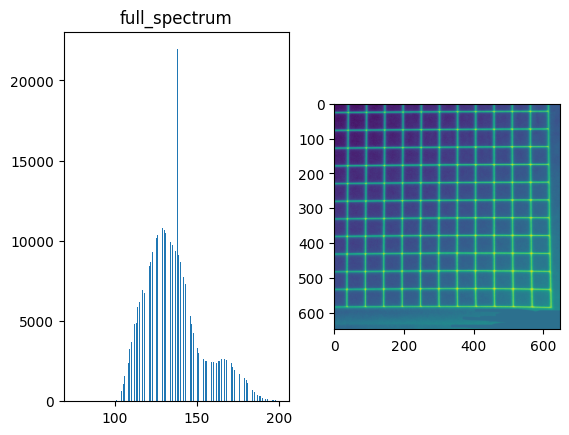

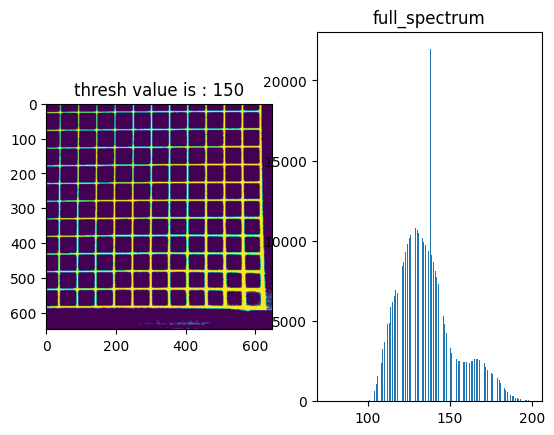

In [757]:
for i in range(len(listex)):
    for j in range(len(listey)):
        gray[listex[j][0]:listex[j][1] , listex[i][0]:listex[i][1]] = np.absolute(gray[listex[j][0]:listex[j][1] , listex[i][0]:listex[i][1]]- (255/1))
        local_area = gray[listex[j][0]:listex[j][1] , listex[i][0]:listex[i][1]]

        local_copy = np.copy(local_area)

        plt.subplot(1,2,1)
        plt.hist(local_area.flatten() , bins = 300 , range = (75,200))
        plt.title("full_spectrum")


        plt.subplot(1,2,2)
        plt.imshow(local_area)
        plt.show()
        

        thresh_value = int(input("thresh value giriniz: "))
        rat1 , local_copy = cv2.threshold(local_area , thresh_value , 255 , cv2.THRESH_BINARY)

        plt.subplot(1,2,1)
        plt.imshow(local_copy)
        plt.title(f"thresh value is : {thresh_value}")

        plt.subplot(1,2,2)
        plt.hist(local_area.flatten() , bins = 300 , range = (75,200))
        plt.title("full_spectrum")
        plt.show()
        answer = input("is this image the image you want ?")


        while answer == "False":

            thresh_value = int(input("thresh value giriniz: "))
            rat1 , local_copy = cv2.threshold(local_area , thresh_value , 255 , cv2.THRESH_BINARY)
            plt.subplot(1,2,1)
            plt.imshow(local_copy)
            plt.title(f"thresh value is : {thresh_value}")

            plt.subplot(1,2,2)
            plt.hist(local_area.flatten() , bins = 300 , range = (75,200))
            plt.title("full_spectrum")
            plt.show()
            answer = input("is this image the image you want ?")

        gray[listex[j][0]:listex[j][1] , listex[i][0]:listex[i][1]] = local_copy


True

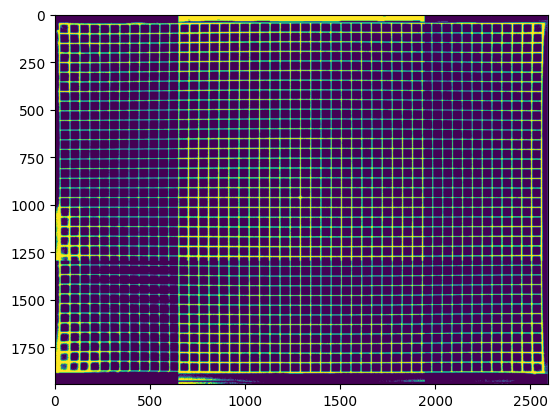

In [768]:
plt.imshow(gray)
cv2.imwrite("background.png" , gray)

In [759]:
gray[listex[1][0]:listex[1][1] , listex[1][0]:listex[1][1]]

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255,   0,   0],
       ...,
       [255, 255, 255, ..., 255,   0,   0],
       [255, 255, 255, ..., 255,   0,   0],
       [255, 255, 255, ..., 255,   0,   0]], dtype=uint8)

In [760]:
a = int(listex[0][0])
b = int(listex[0][1])
print(a , b)

0 648


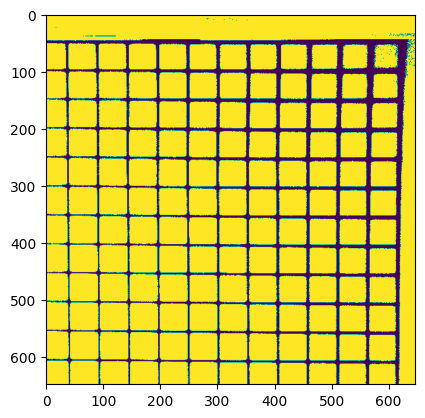

In [761]:
plt.imshow(np.absolute(gray[0:648 , 1944 : 2591] - (255/1)))

In [762]:
type(listex[i][1])

int

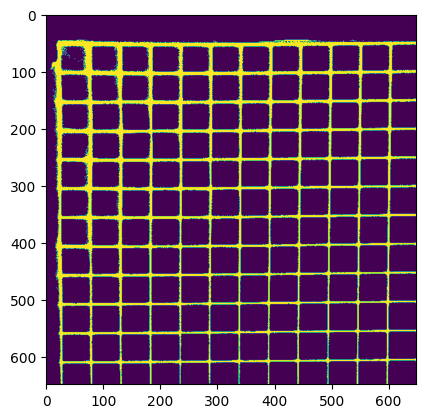

In [763]:
plt.imshow(gray[0:648 , 0:648])